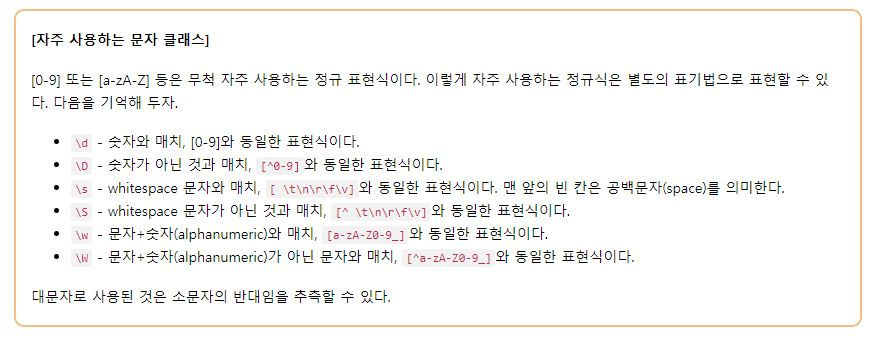

### Greedy vs Non-Greedy (*?, +?, {m, n}?)

#### Non-Greedy
Matches as few times as possible, expanding as needed

In [1]:
import re

web_tag = '<html><head><title>Title</title>'
p1 = re.compile(r"<.*?>")
p2 = re.compile(r"<.*>")

m1 = p1.search(web_tag)
m2 = p2.search(web_tag)

print(m1.group())
print(m2.group())

<html>
<html><head><title>Title</title>


In [2]:
data = """
moon 800905-1049118
kim 700905-1059119
"""

pat = re.compile(r"([a-zA-Z]+)\s+([0-9]+)[-](\d+)")
matches_all1 = pat.match(data)
matches_all11 = pat.match("moon 800905-1049118")
matches_all2 = pat.search(data)
matches_all3 = pat.findall(data)
matches_all4 = pat.finditer(data)


print("match :", matches_all1)  # only match at the beginning of the string
print("match :", matches_all11.group())
print("search : ", matches_all2.group()) # Scan through the string and find matching objects only once
print("findall : ", matches_all3) # Return all non-overlapping matches of pattern in string, as a list of strings. 

if matches_all4:
    for iter_ in matches_all4:
        print('find_iter : ', iter_.group())
else:
    print('No match')

print(pat.sub("\g<1> ******-\g<3>", data))

match : None
match : moon 800905-1049118
search :  moon 800905-1049118
findall :  [('moon', '800905', '1049118'), ('kim', '700905', '1059119')]
find_iter :  moon 800905-1049118
find_iter :  kim 700905-1059119

moon ******-1049118
kim ******-1059119



In [3]:
def hexrepl(match):
    value = int(match.group())
    return hex(value)

p = re.compile(r'\d+')
p.sub(hexrepl, 'Call 65490 for printing, 49152 for user code.')

'Call 0xffd2 for printing, 0xc000 for user code.'

In [4]:
p = re.compile(r'\bclass\b')  # \b is word boundary
p2 = re.compile(r'\Bclass\B') # \B is Non word boundary

print(p.search('no class at all'))
print(p.search('the declassified algorithm'))
print(p2.search('no class at all')) 
print(p2.search('the declassified algorithm'))

<re.Match object; span=(3, 8), match='class'>
None
None
<re.Match object; span=(6, 11), match='class'>


In [5]:
# default, '^' matches only at the beginning of the string, and '$' only at the end of the string

print(re.search(r'^Life', 'Life is too short'))
print(re.search(r'^Life', 'My Life'))
print(re.search(r'short$', 'Life is too short'))
print(re.search(r'short$', 'Life is too short, you need python'))

<re.Match object; span=(0, 4), match='Life'>
None
<re.Match object; span=(12, 17), match='short'>
None


In [6]:
# MULTILINE
# '^' matches at the beginning of the string and at the beginning of each line 
# '$' matches at the end of the string and at the end of each line
p = re.compile(r"^python\s\w+", re.MULTILINE)

data = """python one
life is too short
python two
you need python
python three
"""

print(p.findall(data))

['python one', 'python two', 'python three']


### Grouping
    (target_regex) or (?P<group_name> target_regex)

In [7]:
import re

In [8]:
# If the groups are nested, 
# the index starts from the outside and increases toward the inside.
p = re.compile(r"(\w+)\s+((\d+)[-]\d+[-]\d+)")
m = p.search("park 010-1234-1234")
print(m.group(3))

p2 = re.compile(r"(?P<last_name>\w+)\s+((\d+)[-]\d+[-]\d+)")
m2 = p2.search("park 010-1234-1234")
print(m2.group("last_name"))

print()
print("="*4,"Back Reference","="*4)

# \1 == same as first group, \2 == same as second group ...
p = re.compile(r'(\b\w+)\s+\1')
print(p.search('Paris in in the the spring').group())

p2 = re.compile(r'(?P<word>\b\w+)\s+(?P=word)')
print(p2.search('Paris in the the spring').group())
print()

# find with condition => (?(group_name or group number) then|else)
test_str = """
12345]
12.3456
(120.293)
(18729.28]
2839283)
"""
p3 = re.compile(r"(?P<paren>\()?\d+(\.\d+)?(?(paren)\)|])")
m = p3.finditer(test_str)

if m:
    for iter_ in m:
        print(iter_.group())
else:
    print("No match")

010
park

==== Back Reference ====
in in
the the

12345]
(120.293)
18729.28]


### Lookahead Assertions

    (?=...)  // positive lookahead => Have to match but not consume target string
    (?!...)  // negative lookahead => match something not followed by something else and not consume target string

In [9]:
p = re.compile(r".+(?=:)")
m = p.search("http://google.com")
print(m.group())

http


In [10]:
file_list = ["myinfo.txt", "key.json", "auto.bat", "python.exe", "auto.conf"]
p = re.compile(r".*[.](?!bat$|exe$).*$")

for iter_ in file_list:
    m = p.search(iter_)
    if m:
        print(m.group())
    else:
        print("No match")

myinfo.txt
key.json
No match
No match
auto.conf


### Lookbehind Assertions
    (?<=...)  // positive lookahead => Have to match from behind but consume use target string
    (?<!...)  // negative lookahead => must not match from behind and not consume target string

In [11]:
cost_list="""
ABC01: $23.45
HGG42: $5.31
CFMX1: $899.00
"""
p = re.compile(r"(?<=\$)[0-9].+")
cost_match = p.finditer(cost_list)
if cost_match:
    for iter_ in cost_match:
        print(iter_.group())
else:
    print("No match")

23.45
5.31
899.00


In [12]:
buyLog = """
I paid $30 for 100 apples,
50 oranges, and 60 pears.
I saved $5 on this order.
"""
p = re.compile(r"\b(?<!\$)\d+\b")
num_match = p.finditer(buyLog)

if num_match:
    for iter_ in num_match:
        print(iter_.group())
else:
    pritn("No match")


100
50
60
